In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Directly create the DataFrame with the Braking Data
data = {
    'Time (s)': [0, 1, 2, 3, 4, 5, 6],
    'Speed (kmph)': [100, 90, 80, 60, 40, 20, 0],
    'Decel_Rate (m/s^2)': [0, 2.78, 2.78, 5.56, 5.56, 5.56, 5.56],
    'Brake_Torque_Required (Nm)': [0, 200, 200, 400, 400, 400, 400],
    'Motor_Max_Regen_Torque (Nm)': [0, 250, 250, 350, 400, 450, 200]
}

df = pd.DataFrame(data)

# Print the first few rows to verify the data
print("--- Loaded Braking Data ---")
print(df.head(7))

--- Loaded Braking Data ---
   Time (s)  Speed (kmph)  Decel_Rate (m/s^2)  Brake_Torque_Required (Nm)  \
0         0           100                0.00                           0   
1         1            90                2.78                         200   
2         2            80                2.78                         200   
3         3            60                5.56                         400   
4         4            40                5.56                         400   
5         5            20                5.56                         400   
6         6             0                5.56                         400   

   Motor_Max_Regen_Torque (Nm)  
0                            0  
1                          250  
2                          250  
3                          350  
4                          400  
5                          450  
6                          200  


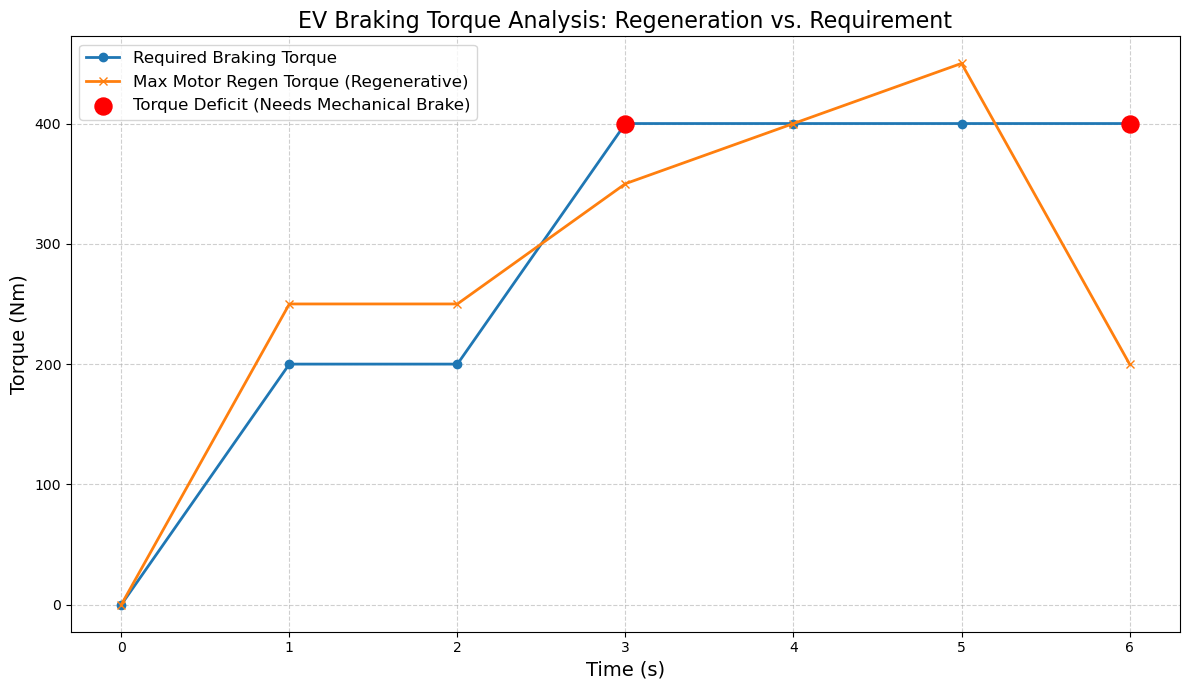


             Braking Analysis Summary (EV MBD Project)
⚠️ Findings: Mechanical braking is required at 2 time steps.
These time steps are crucial for determining the sizing of the mechanical brake system.

Deficit Points (where Motor Regen is insufficient):
   Time (s)  Brake_Torque_Required (Nm)  Motor_Max_Regen_Torque (Nm)  \
3         3                         400                          350   
6         6                         400                          200   

   Brake_Torque_Deficit  
3                    50  
6                   200  


In [3]:
# 1. Perform necessary calculations
# Calculate the difference between Required Torque and Max Motor Regen Torque.
# A positive value means the motor cannot handle the braking alone.
df['Brake_Torque_Deficit'] = df['Brake_Torque_Required (Nm)'] - df['Motor_Max_Regen_Torque (Nm)']

# 2. Identify where the Motor Regen Torque is insufficient
# Filter the data frame for points where the deficit is greater than 0
deficit_points = df[df['Brake_Torque_Deficit'] > 0]

# 3. Visualize the Data (Graph)

# Set the figure size for better visibility
plt.figure(figsize=(12, 7))

# Plot the two main torque curves
plt.plot(df['Time (s)'], df['Brake_Torque_Required (Nm)'], label='Required Braking Torque', marker='o', linewidth=2)
plt.plot(df['Time (s)'], df['Motor_Max_Regen_Torque (Nm)'], label='Max Motor Regen Torque (Regenerative)', marker='x', linewidth=2)

# Highlight the deficit points on the graph (where mechanical brakes are needed)
if not deficit_points.empty:
    plt.scatter(deficit_points['Time (s)'], deficit_points['Brake_Torque_Required (Nm)'], 
                color='red', s=150, zorder=5, label='Torque Deficit (Needs Mechanical Brake)')

# Add graph titles and labels
plt.title('EV Braking Torque Analysis: Regeneration vs. Requirement', fontsize=16)
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Torque (Nm)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# 4. Analysis Summary (Text Output)
print("\n" + "="*50)
print("             Braking Analysis Summary (EV MBD Project)")
print("="*50)
if not deficit_points.empty:
    print(f"⚠️ Findings: Mechanical braking is required at {len(deficit_points)} time steps.")
    print("These time steps are crucial for determining the sizing of the mechanical brake system.")
    print("\nDeficit Points (where Motor Regen is insufficient):")
    # Display only the relevant columns for easy understanding
    print(deficit_points[['Time (s)', 'Brake_Torque_Required (Nm)', 'Motor_Max_Regen_Torque (Nm)', 'Brake_Torque_Deficit']])
else:
    print("✅ Conclusion: Motor Regen Torque was sufficient at all points in this driving cycle.")

print("="*50)